In [13]:
import os

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

import config
from retina_face_detector.face_detector import FaceDetector
from src.utils import draw_box_name
from dataset_utils.mtcnn_pytorch.src.align_trans import get_reference_facial_points, warp_and_crop_face

In [14]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
detector = FaceDetector('mobilenet', device)

remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:300
RetinaNet model loaded.


In [15]:
image_path = "input/omid.jpeg"
image = cv2.imread(image_path)
image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_image = image.copy()

bounding_boxes, faces, landmarks = detector.detect(image)
print('number of detected faces: ', len(faces))

for i, bbox in enumerate(bounding_boxes):
    bbox = np.array(bbox, dtype='uint8')
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 4)
    for landmark in landmarks[i]:
        landmark = np.array(landmark, dtype='uint8')
        cv2.circle(image, (landmark[0], landmark[1]), 8, (0, 255, 0), -1)

Finished 'detect' in 0.0676 secs
number of detected faces:  1


In [16]:
image_landmarks = original_image.copy()

for i, bbox in enumerate(bounding_boxes):
    for landmark in landmarks[i]:
        landmark = np.array(landmark, dtype='uint8')
        cv2.circle(image_landmarks, (landmark[0], landmark[1]), 8, (0, 255, 0), -1)

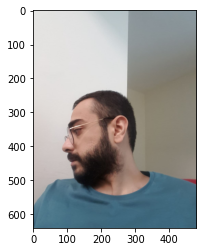

In [17]:
plt.imshow(original_image)

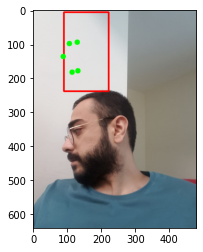

In [18]:
plt.imshow(image)

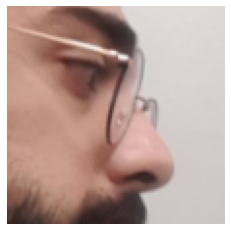

In [19]:
landmark = landmarks[i]
reference = get_reference_facial_points(default_square=True)
warped_face = warp_and_crop_face(np.array(original_image), landmark, reference, crop_size=(112, 112))
plt.axis('off')
plt.imshow(warped_face)

In [20]:
reference = np.array([
    [30.29459953,  51.69630051],
    [65.53179932,  51.50139999],
    [48.02519989,  71.73660278],
    [33.54930115,  92.3655014],
    [62.72990036,  92.20410156]
])

landmark = landmarks[i]
landmark = np.array(landmark)

In [21]:
from skimage import transform as trans

tform = trans.SimilarityTransform()
tform.estimate(landmark, reference)
M = tform.params[0:2,:]

ModuleNotFoundError: No module named 'skimage'

In [22]:
wrapped = cv2.warpAffine(image ,M,(96,112), borderValue = 0.0)
plt.imshow(wrapped)

NameError: name 'M' is not defined

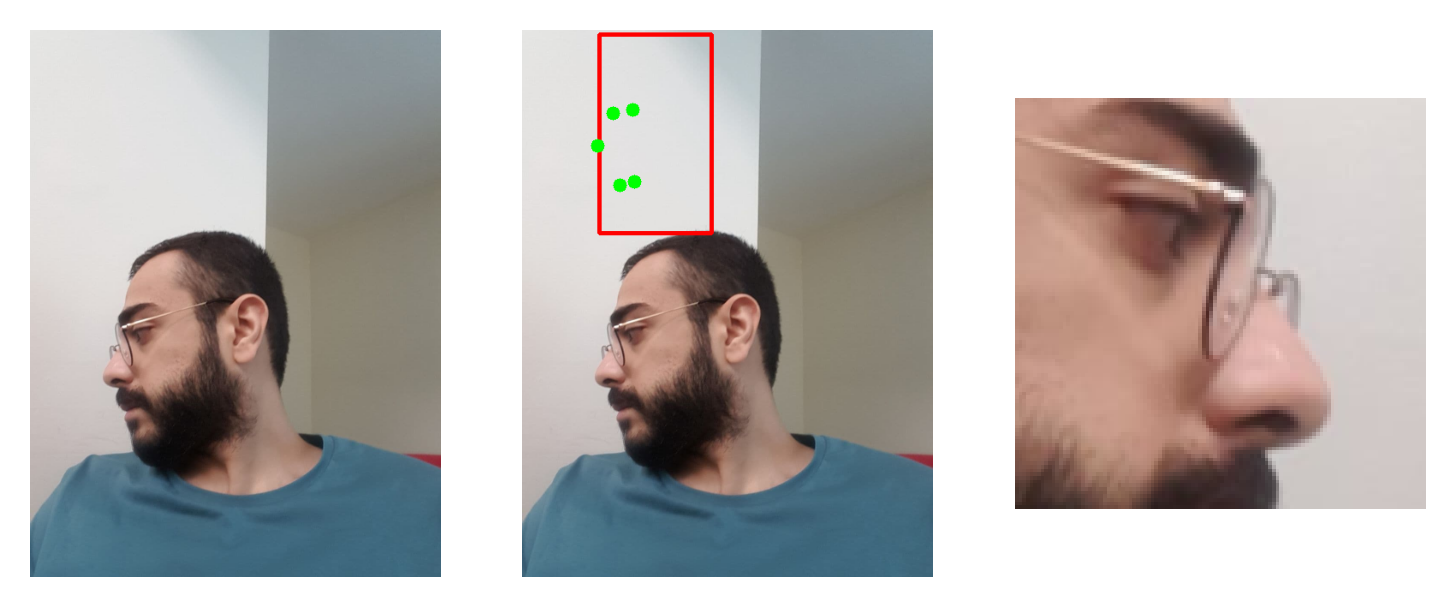

In [23]:
fig, axs = plt.subplots(1, 3,  dpi= 300)
# fig.suptitle('Face Detection and Alignment')
axs[0].axis('off')
axs[0].imshow(original_image)
axs[1].axis('off')
axs[1].imshow(image)
axs[2].axis('off')
axs[2].imshow(warped_face)